In [ ]:
This project aim to analyze how the different levels of the AQI values can effects on the vulnerable groups such as adults,olders,childrens wh are facing some pre existing health diseases.

In [3]:
import pandas as pd # to handle the dataset
data=pd.read_csv("global_air_pollution_data.csv")
data

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [4]:
data.shape #it tells about rows and columns

(23463, 12)

In [5]:
data.isnull().sum() # to count the null values for individual columns

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [7]:

aqi_to_group = {
    (0, 50): 'People with asthma, chronic bronchitis, or other respiratory conditions, pregnant women, children',
    (51, 100): 'People with heart disease or other cardiovascular conditions, People who spend a lot of time outdoors, such as outdoor workers or athletes',
    (101, 150): 'Older adults, hypertension, chest pain, palpitations, or shortness of breath',
    (151, 200): 'Chronic Obstructive Pulmonary Disease (COPD), Allergic Rhinitis, throat irritation, respiratory diseases',
    (201, float('inf')): 'Asthma, Chronic Obstructive Pulmonary Disease (COPD), Bronchitis'
}
# Function to map AQI value to affected group
def get_affected_group(aqi):
    for (low, high), group in aqi_to_group.items():
        if low <= aqi <= high:
            return group
    return None

# Apply the function to create the new column
data['affected_groups'] = data['aqi_value'].apply(get_affected_group)

# Display the DataFrame
data


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,affected_groups
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,People with heart disease or other cardiovascu...
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,"People with asthma, chronic bronchitis, or oth..."
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,People with heart disease or other cardiovascu...
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,"People with asthma, chronic bronchitis, or oth..."
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,"People with asthma, chronic bronchitis, or oth..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,"Chronic Obstructive Pulmonary Disease (COPD), ..."
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,"People with asthma, chronic bronchitis, or oth..."
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,"People with asthma, chronic bronchitis, or oth..."
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,People with heart disease or other cardiovascu...


In [14]:
from sklearn.preprocessing import OneHotEncoder
cat_col=["aqi_category","co_aqi_category","ozone_aqi_category","no2_aqi_category","pm2.5_aqi_category","affected_groups"]
encoder=OneHotEncoder(sparse=False,drop='first')# drop the first column
# it transforms the categorical values in to numerical values
encoded_cols=encoder.fit_transform(data[cat_col]) 
#it divides every category as a column based on every value in cat_col list. It gives that all names
encoded_col_names=encoder.categories_ 
#It rename those names as in a understandable way.it divides all values as a column for a particular attribute.so it rename the column names as like attribute_categoricalName 
encoded_col_names=[f'{col}_{val}' for col,vals in zip(cat_col,encoded_col_names) for val in vals[1:]]
#It deletes the columns in cat_col list and Add the column names as encoded_col_names and corresponding values.
data_encoded=pd.concat([data.drop(cat_col,axis=1),pd.DataFrame(encoded_cols,columns=encoded_col_names)],axis=1)
data_encoded

/home/rgukt/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country_name,city_name,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category_Hazardous,aqi_category_Moderate,aqi_category_Unhealthy,...,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy,"affected_groups_Chronic Obstructive Pulmonary Disease (COPD), Allergic Rhinitis, throat irritation, respiratory diseases","affected_groups_Older adults, hypertension, chest pain, palpitations, or shortness of breath","affected_groups_People with asthma, chronic bronchitis, or other respiratory conditions, pregnant women, children","affected_groups_People with heart disease or other cardiovascular conditions, People who spend a lot of time outdoors, such as outdoor workers or athletes"
0,Russian Federation,Praskoveya,51,1,36,0,51,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Brazil,Presidente Dutra,41,1,5,1,41,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Italy,Priolo Gargallo,66,1,39,2,66,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Poland,Przasnysz,34,1,34,0,20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,France,Punaauia,22,0,22,0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,3,154,2,184,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23459,France,Sceaux,50,1,20,5,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23460,India,Mormugao,50,1,22,1,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23461,United States of America,Westerville,71,1,44,2,71,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
#here we need not to remove null values about country_name and city_name because these are not used in any where in predictions and calculations 
data_encoded.isnull().sum()

country_name                                                                                                                                                  427
city_name                                                                                                                                                       1
aqi_value                                                                                                                                                       0
co_aqi_value\t                                                                                                                                                  0
ozone_aqi_value                                                                                                                                                 0
no2_aqi_value                                                                                                                                                   0
pm2.5_aqi_value             

In [17]:
#These are the columns of our final dataset
data_encoded.columns

Index(['country_name', 'city_name', 'aqi_value', 'co_aqi_value\t',
       'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value',
       'aqi_category_Hazardous', 'aqi_category_Moderate',
       'aqi_category_Unhealthy', 'aqi_category_Unhealthy for Sensitive Groups',
       'aqi_category_Very Unhealthy', 'co_aqi_category_Moderate',
       'co_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Moderate', 'ozone_aqi_category_Unhealthy',
       'ozone_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Very Unhealthy', 'no2_aqi_category_Moderate',
       'pm2.5_aqi_category_Hazardous', 'pm2.5_aqi_category_Moderate',
       'pm2.5_aqi_category_Unhealthy',
       'pm2.5_aqi_category_Unhealthy for Sensitive Groups',
       'pm2.5_aqi_category_Very Unhealthy',
       'affected_groups_Chronic Obstructive Pulmonary Disease (COPD), Allergic Rhinitis, throat irritation, respiratory diseases',
       'affected_groups_Older adults, hypertension, chest pain,

In [18]:
# It gives unique values of 'co_aqi_category' attribute to know what values are
unique_categories = data['co_aqi_category'].unique()
print(unique_categories)

['Good' 'Unhealthy for Sensitive Groups' 'Moderate']


<Figure size 1200x800 with 0 Axes>

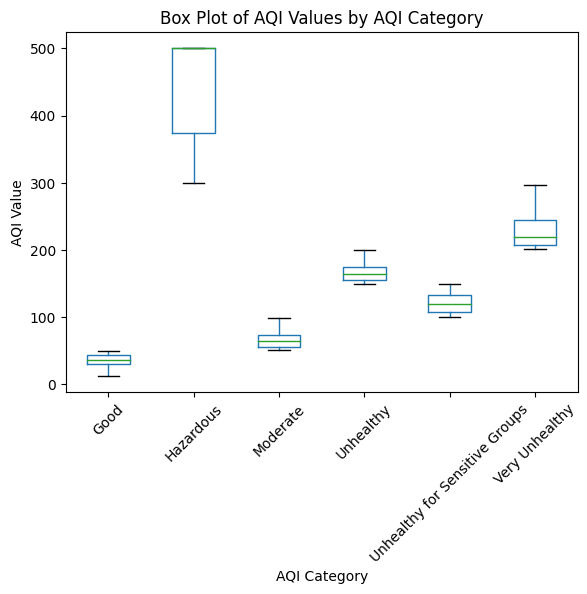

In [27]:
# Box plot of AQI values by AQI category
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
data.boxplot(column='aqi_value', by='aqi_category', grid=False, showfliers=False)
plt.title('Box Plot of AQI Values by AQI Category')
plt.suptitle('')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Result:-Above we draw boxplot between AQI categorical and AQI values.There are no outliers in our dataset

In [28]:
data['co_aqi_value\t'].unique()

array([  1,   0,   3,   2,   5,   4,   7,  31,  12,  14,   9,   6,  10,
         8,  15,  27,  11,  16,  21,  13, 133,  22,  20,  28,  18,  17,
        19,  67,  51,  41,  35,  49,  36,  23])

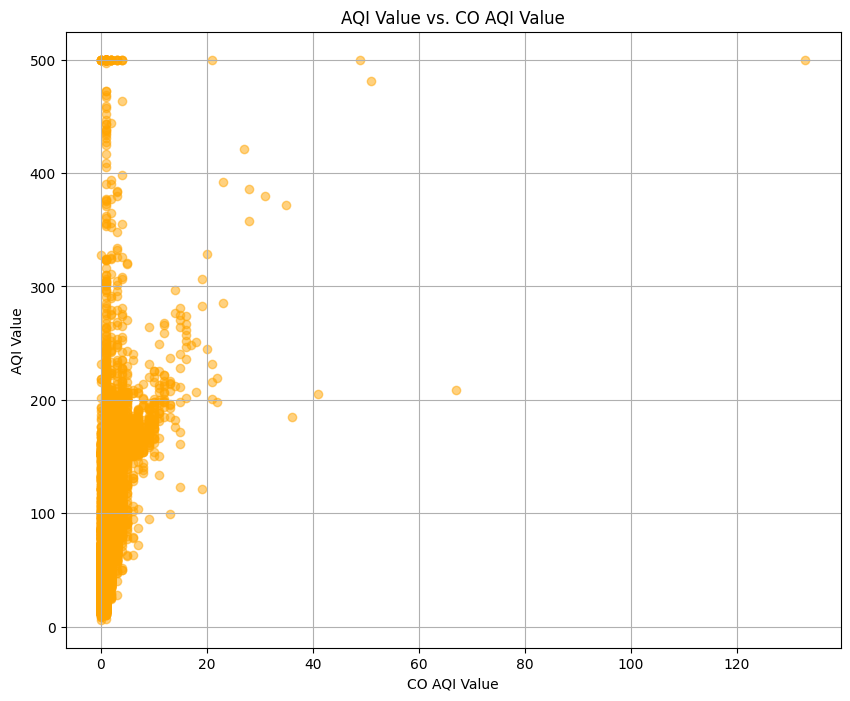

In [29]:
# Scatter plot of AQI values vs. CO AQI values
plt.figure(figsize=(10, 8))
plt.scatter(data['co_aqi_value\t'], data['aqi_value'], alpha=0.5, color='orange')
plt.title('AQI Value vs. CO AQI Value')
plt.xlabel('CO AQI Value')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()


In [ ]:
Result:-Scatter plots are used to observe relationships, trends, and patterns between the two variables.Here trends between CO AQI Value and AQI value


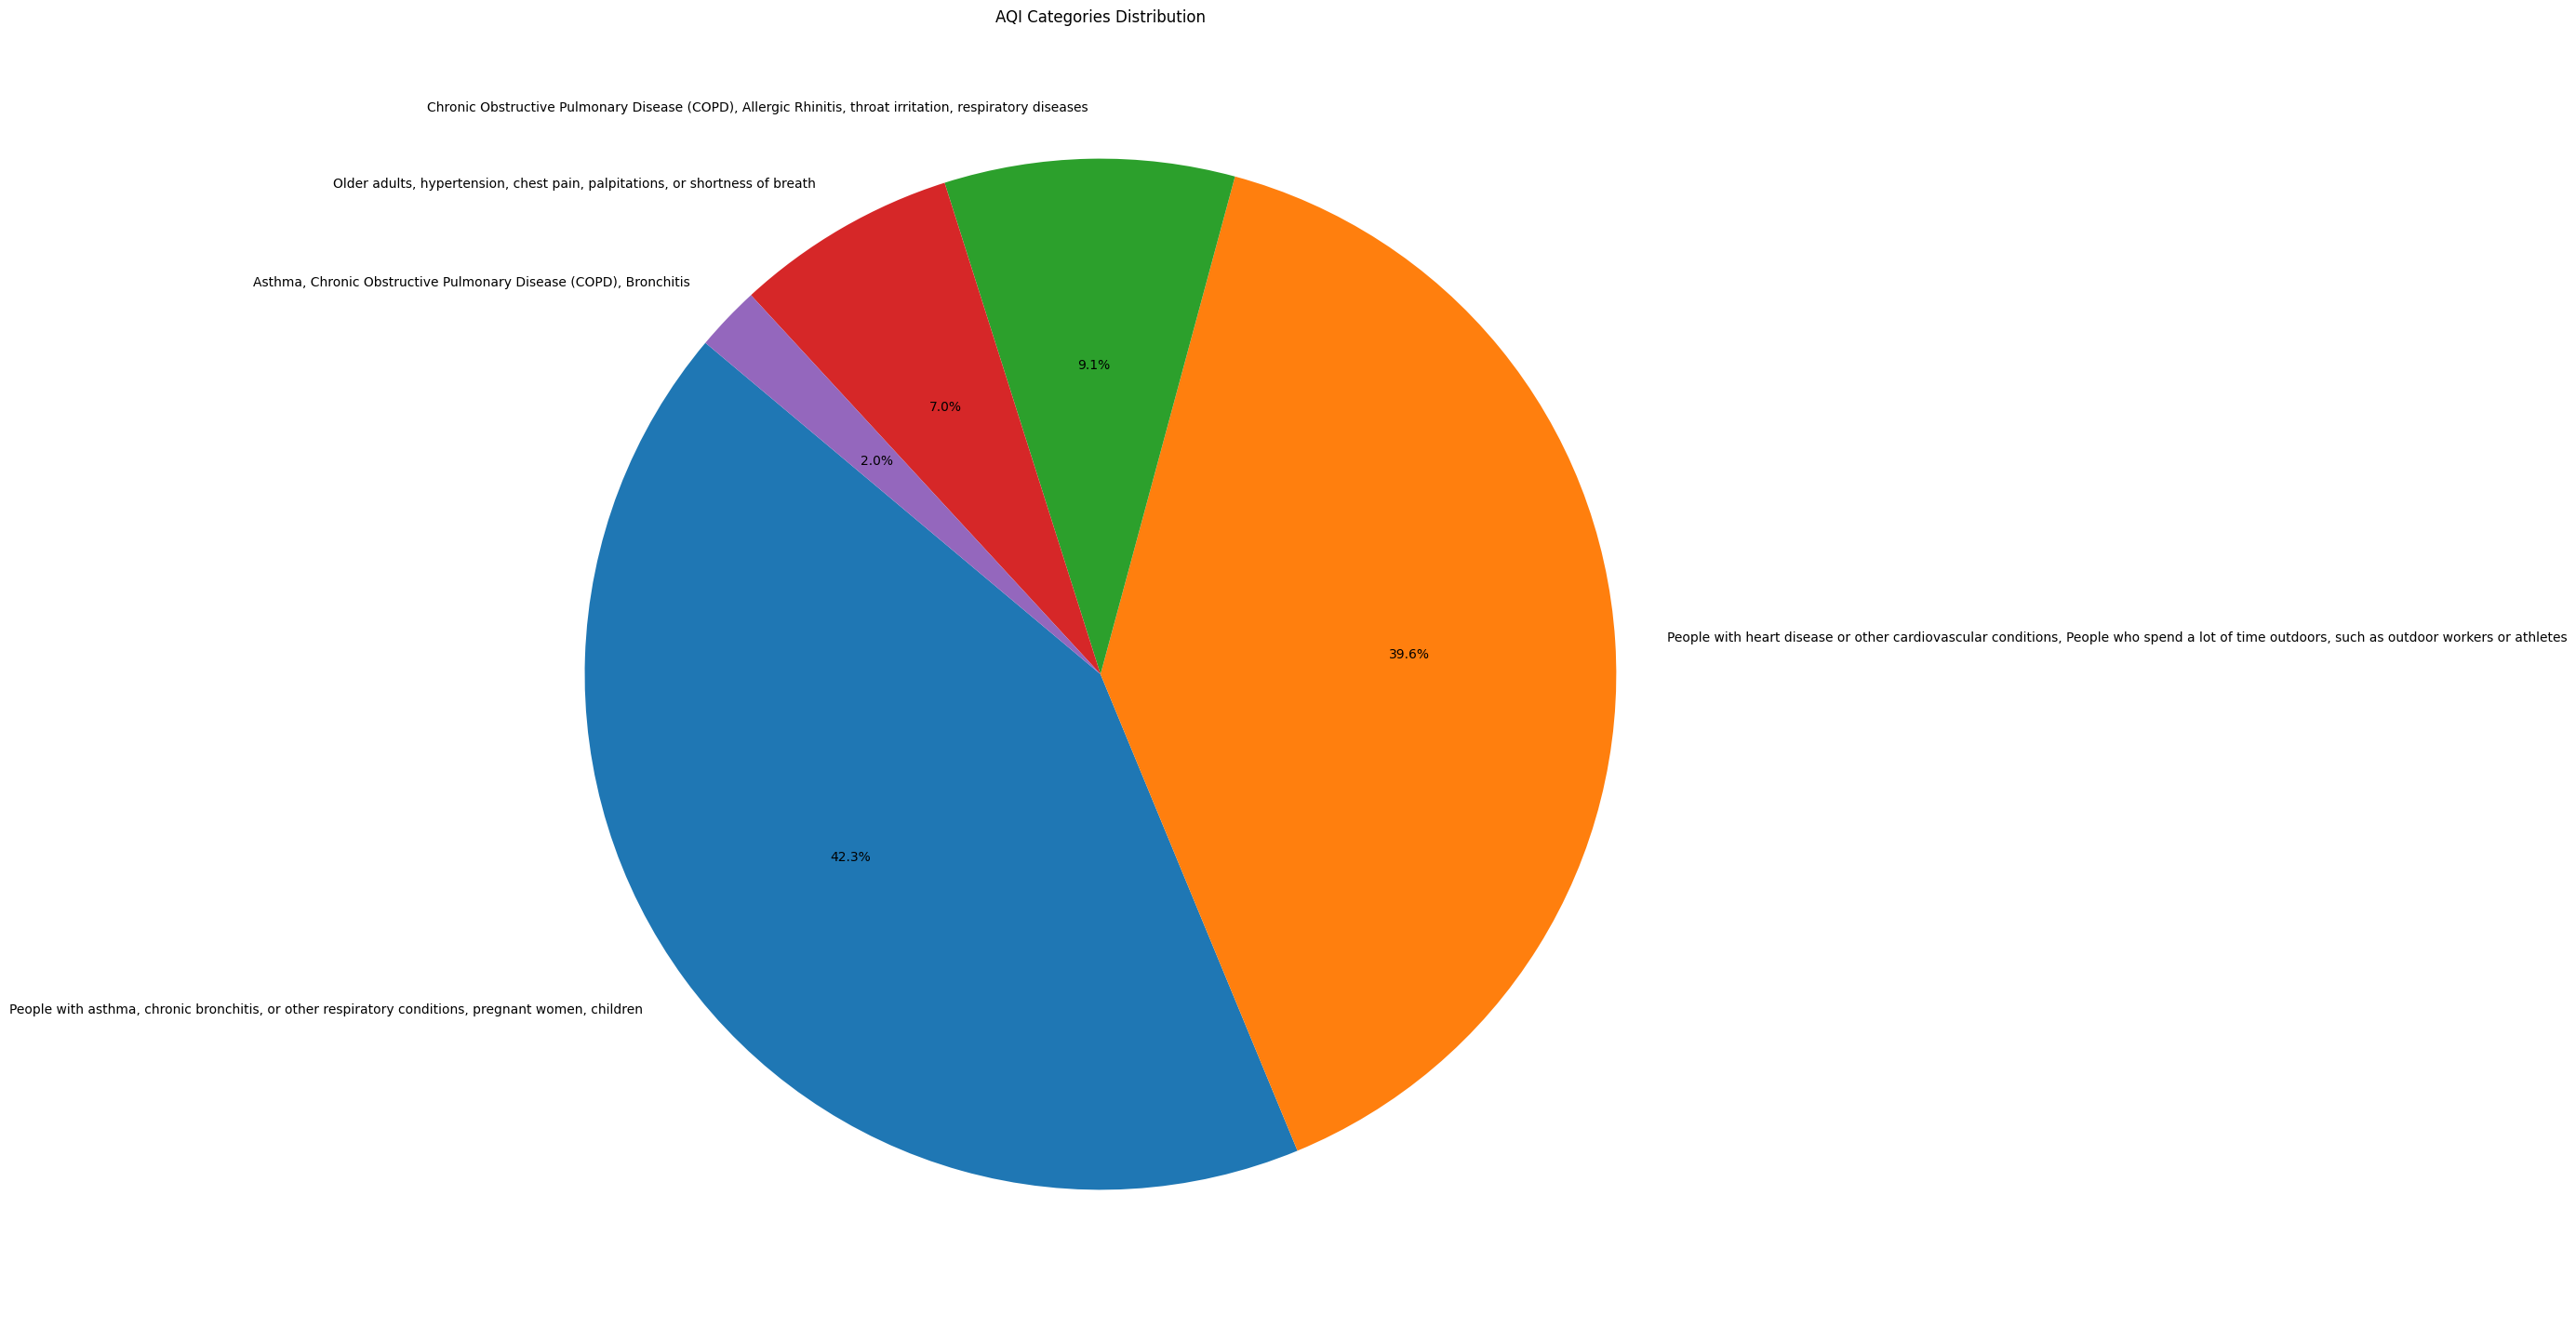

In [31]:
# Count the occurrences of each AQI category
aqi_category_counts = data['affected_groups'].value_counts()

# Plotting pie chart of AQI categories
plt.figure(figsize=(18, 18))
plt.pie(aqi_category_counts, labels=aqi_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('AQI Categories Distribution')
plt.show()


In [ ]:
Result:- This pie chart describes about how much percentage of vulnerabilities people affected 

/home/rgukt/.local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/rgukt/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


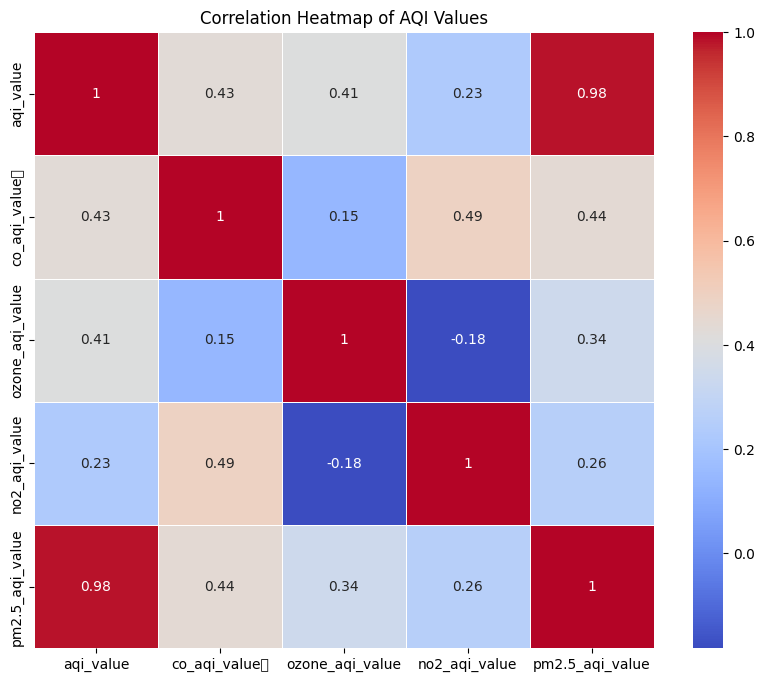

In [34]:
import seaborn as sns

# Selecting relevant columns for correlation heatmap
aqi_columns = ['aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
corr_data = data[aqi_columns]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of AQI Values')
plt.show()


In [ ]:
Result:-Heatmaps are particularly useful for visualizing the intensity of a phenomenon across a two-dimensional area and for identifying patterns

/home/rgukt/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/rgukt/.local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/rgukt/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


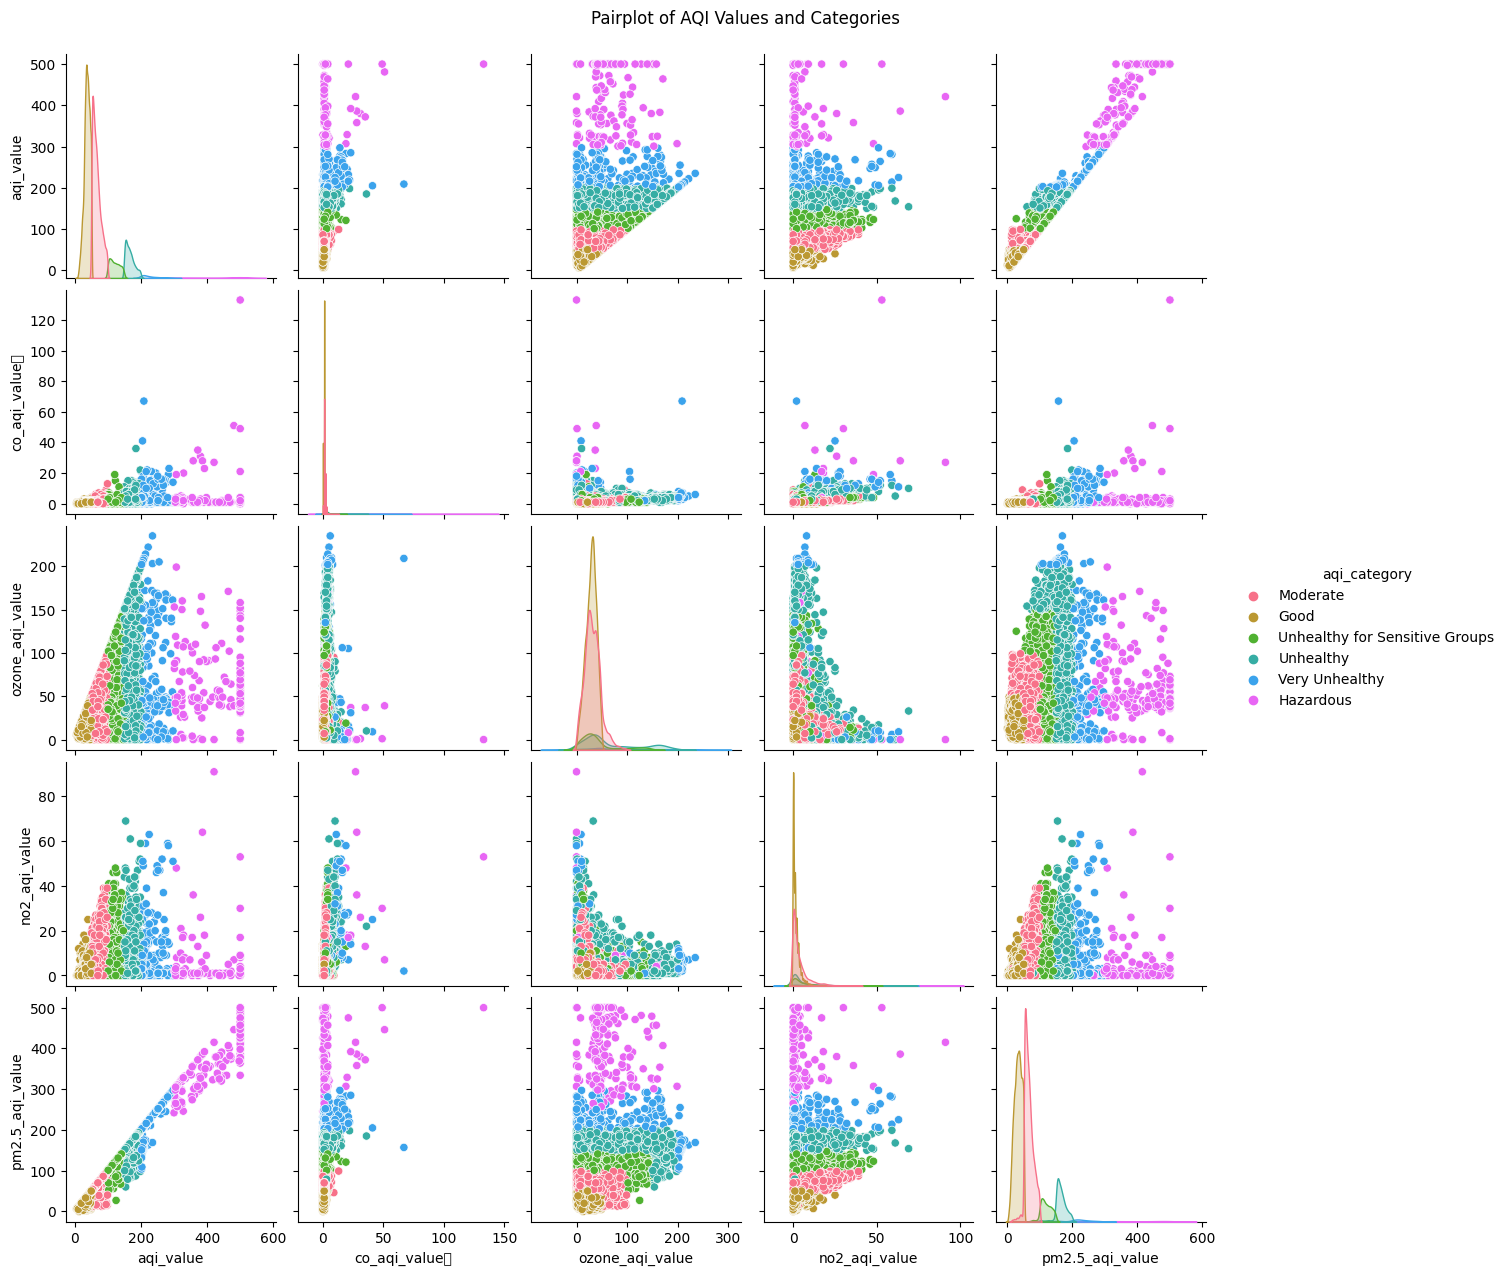

In [35]:
# Selecting relevant columns for pairplot
pairplot_columns = ['aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value', 'aqi_category']

# Plotting pairplot
sns.pairplot(data[pairplot_columns], hue='aqi_category', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of AQI Values and Categories', y=1.02)
plt.show()


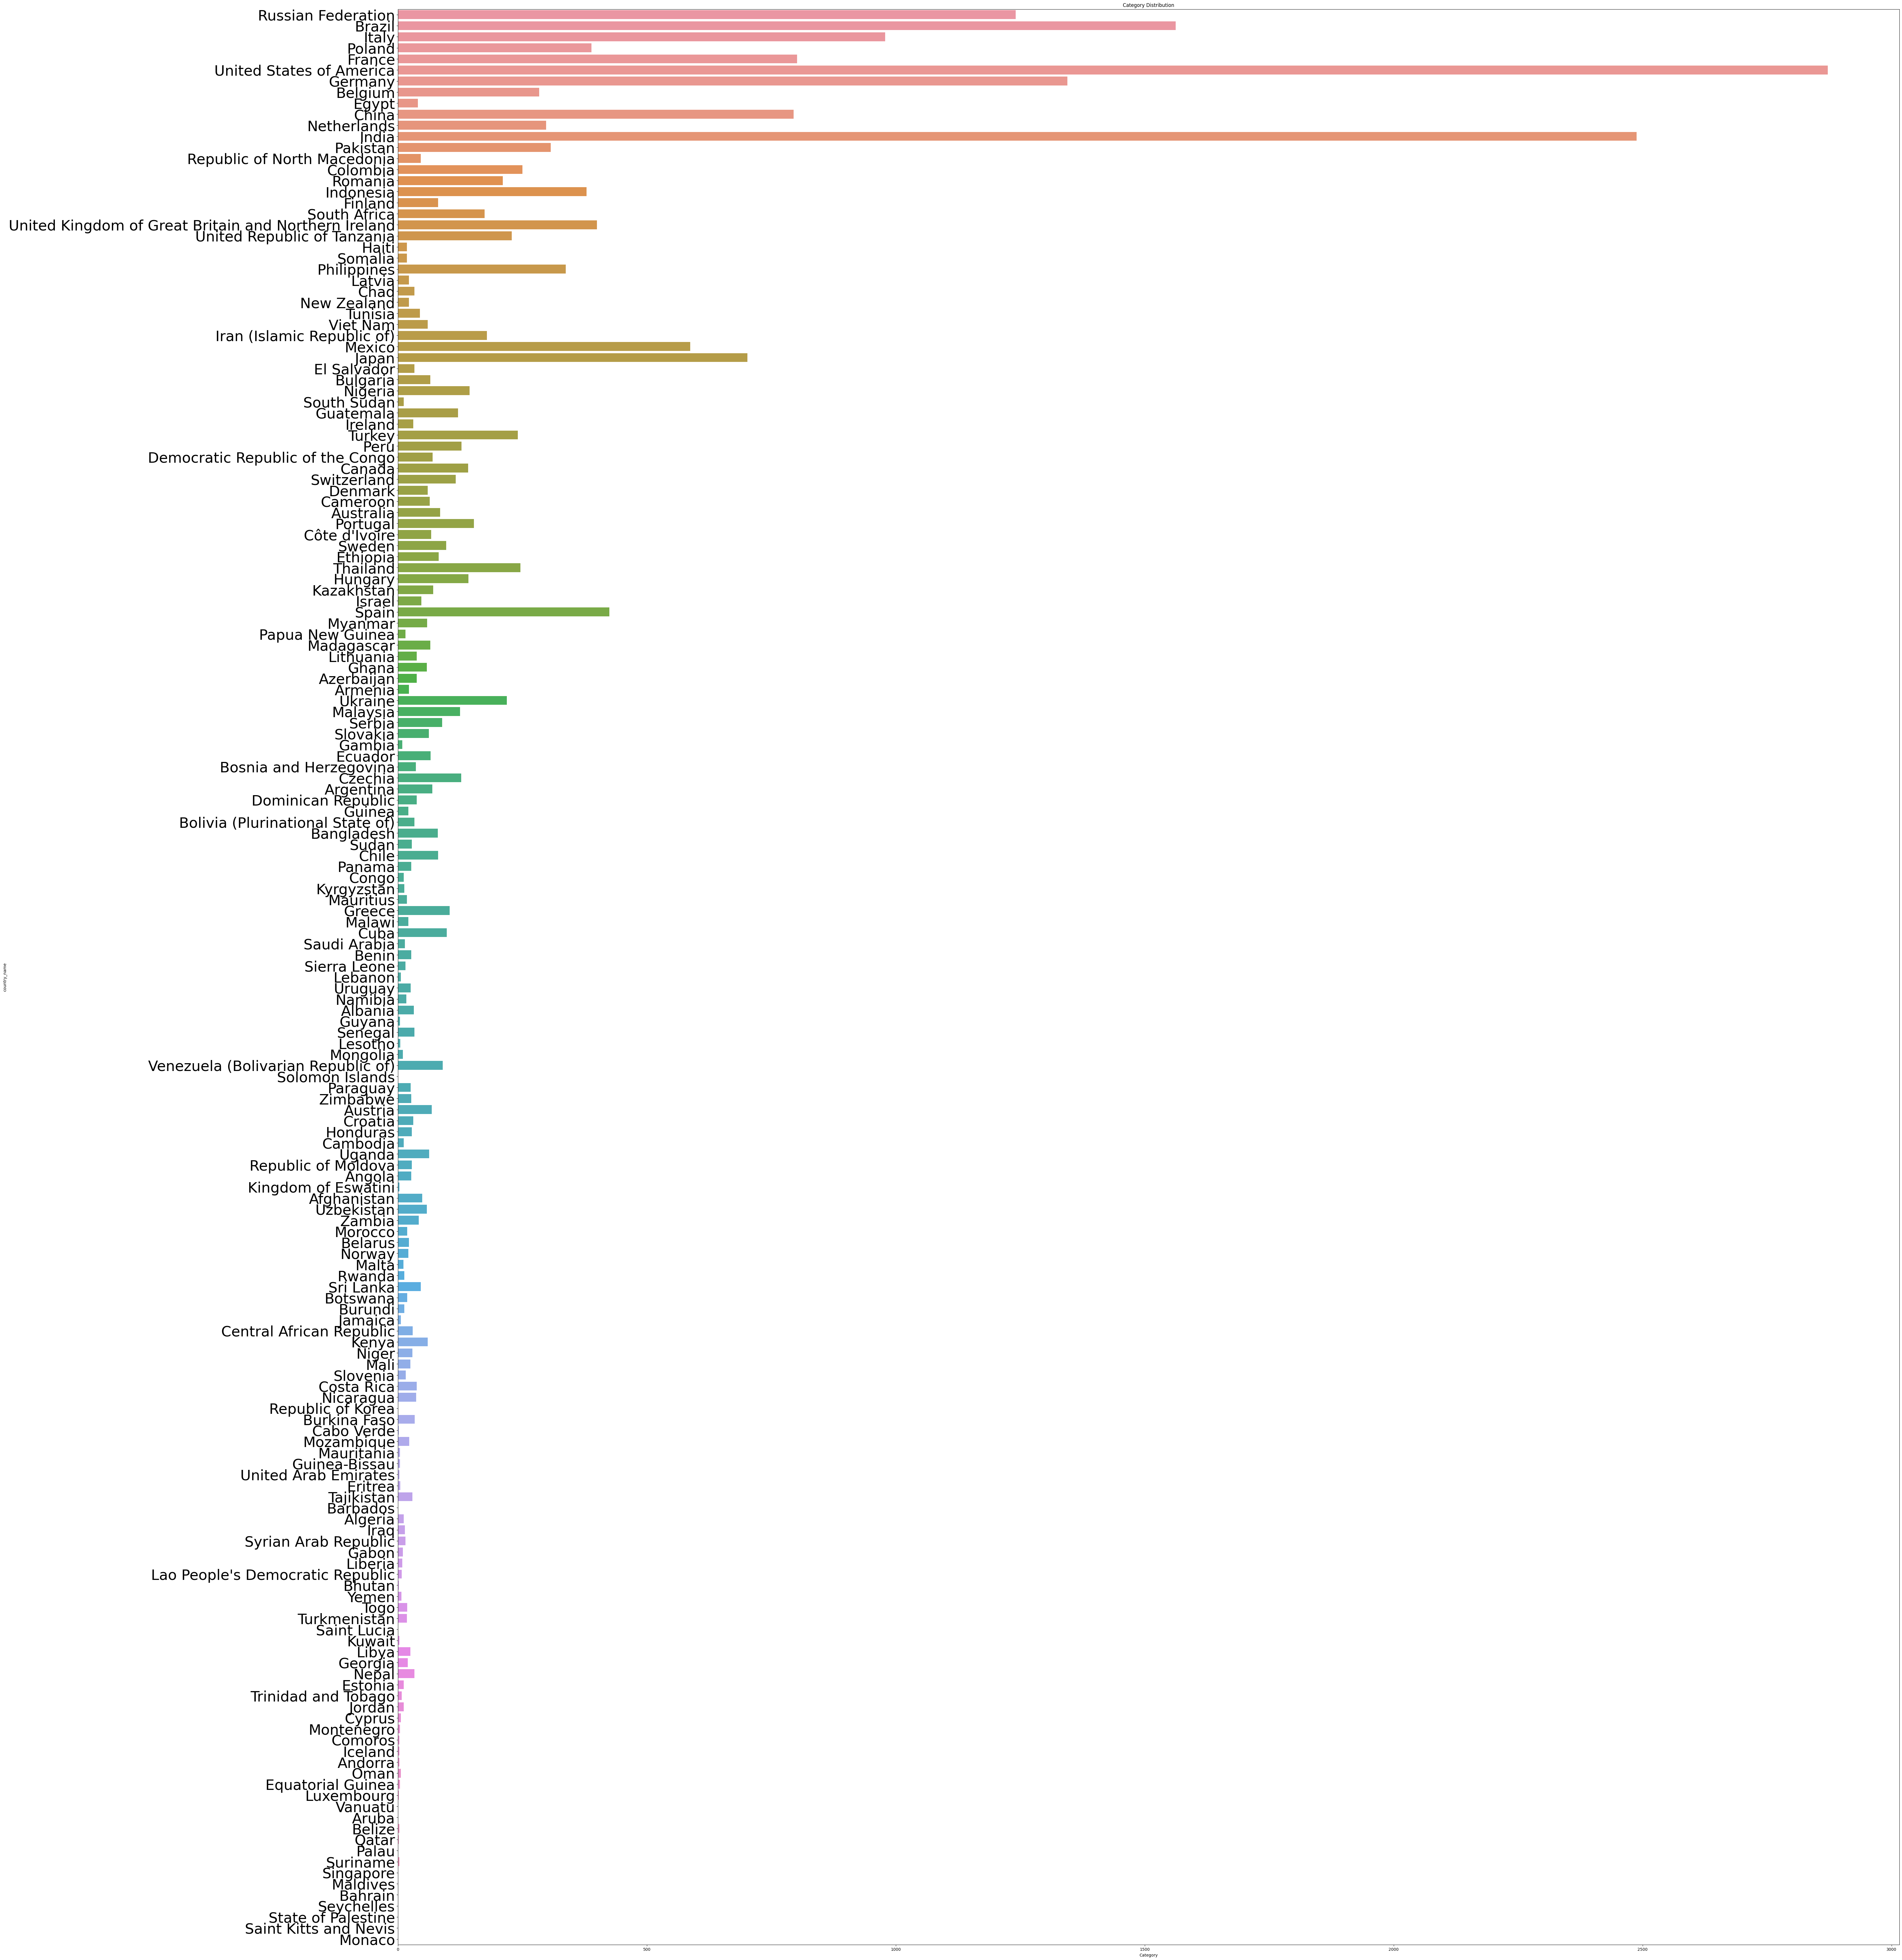

In [48]:
data.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category', 'affected_groups'],
      dtype='object')

In [36]:
data.shape


(23463, 13)

In [37]:
data_encoded.shape

(23463, 28)

In [38]:
# using KNeighborsClassifier calculating accuracy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
feature_cols=data_encoded.columns.drop(['aqi_value','country_name','city_name'])
x=data_encoded[feature_cols]
y=data_encoded['aqi_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6285957809503516


In [39]:
#calculting accuracy using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9682505859791178
